In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [2]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

In [3]:
print("xtrain :- ",xtrain.shape)
print("ytrain :- ",ytrain.shape)
print("xtest  :- ",xtest.shape)
print("ytest  :- ",ytest.shape)

xtrain :-  (50000, 32, 32, 3)
ytrain :-  (50000, 1)
xtest  :-  (10000, 32, 32, 3)
ytest  :-  (10000, 1)


In [4]:
from keras.utils import to_categorical
ytrain =to_categorical(ytrain) 
ytest = to_categorical(ytest)

In [5]:
from keras.layers import AveragePooling2D,Conv2D,Dense,Activation,Flatten
from keras.models import Sequential

In [6]:
xtrain.shape[-3:]

(32, 32, 3)

In [7]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),strides = (2,2),input_shape=xtrain.shape[1:]))
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(20,(3,3)))
model.add(AveragePooling2D((2,2)))
model.add(Flatten())
model.add(Dense(16))
model.add(Dense(12))
model.add(Dense(10,))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 64)        1792      
_________________________________________________________________
average_pooling2d (AveragePo (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 20)          11540     
_________________________________________________________________
average_pooling2d_1 (Average (None, 2, 2, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                1296      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                2

In [8]:
history = model.fit(xtrain,ytrain,batch_size=256,epochs=250)

Epoch 1/250
196/196 [==============================] - 4s 6ms/step - loss: 15.1255 - accuracy: 0.1631
Epoch 2/250
196/196 [==============================] - 1s 5ms/step - loss: 2.4541 - accuracy: 0.2514
Epoch 3/250
196/196 [==============================] - 1s 5ms/step - loss: 2.1407 - accuracy: 0.2757
Epoch 4/250
196/196 [==============================] - 1s 5ms/step - loss: 2.0309 - accuracy: 0.2984
Epoch 5/250
196/196 [==============================] - 1s 5ms/step - loss: 1.9733 - accuracy: 0.3106
Epoch 6/250
196/196 [==============================] - 1s 5ms/step - loss: 1.9349 - accuracy: 0.3246
Epoch 7/250
196/196 [==============================] - 1s 5ms/step - loss: 1.9140 - accuracy: 0.3313
Epoch 8/250
196/196 [==============================] - 1s 5ms/step - loss: 1.8834 - accuracy: 0.3425
Epoch 9/250
196/196 [==============================] - 1s 5ms/step - loss: 1.8682 - accuracy: 0.3450
Epoch 10/250
196/196 [==============================] - 1s 5ms/step - loss: 1.8606 - accur

In [9]:
history = pd.DataFrame(history.history)
history

,loss,accuracy
0,6.765108,0.19534
1,2.344730,0.25938
2,2.094036,0.28318
3,2.009014,0.30362
4,1.952580,0.31682
...,...,...
245,1.758080,0.39462
246,1.757231,0.39664
247,1.759657,0.39672
248,1.757356,0.39666


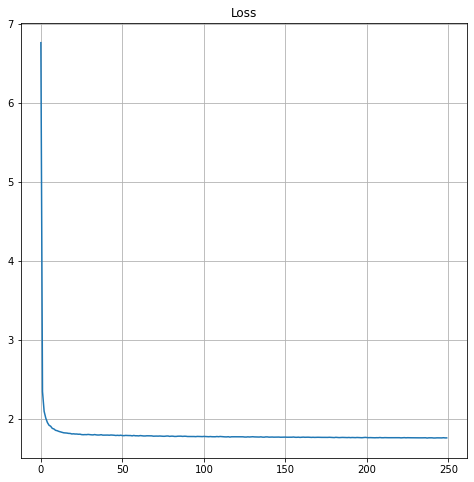

In [10]:
history.loss.plot.line(figsize=(8,8),title = "Loss",grid = "whitegrid",)

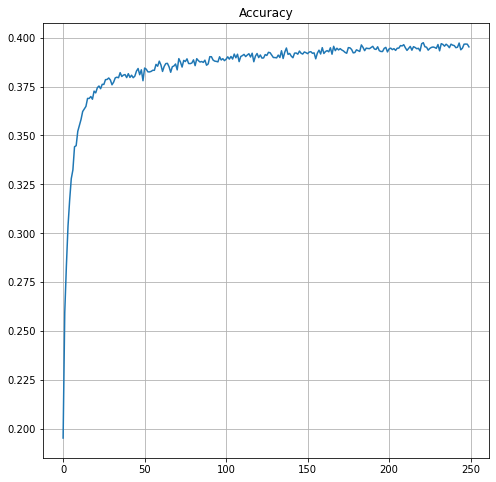

In [11]:
history.accuracy.plot.line(figsize=(8,8),title = "Accuracy",grid = "whitegrid")

In [12]:
predictions = np.argmax(model.predict(xtest),axis=1)

In [13]:
predictions

array([3, 8, 8, ..., 5, 5, 7])

In [14]:
ytest = np.argmax(ytest,axis=1)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(predictions,ytest))

0.3779


In [16]:
print(confusion_matrix(predictions,ytest))

[[511 102 109  47  61  53  23  53 266 110]
 [ 41 432  43  39  14  34  18  34  67 160]
 [ 52  21 225  97 103  82  59  57  13  22]
 [ 21  47  77 255  67 134 141  57  28  32]
 [ 24  44 162  73 310  93 135  78  19  22]
 [ 33  55 100 201 106 362  90  73  63  37]
 [ 25  30 117 119 129  76 432  38  10  52]
 [ 86  53 124  92 165 108  68 505  57  78]
 [151  57  29  26  19  31  10  26 356  96]
 [ 56 159  14  51  26  27  24  79 121 391]]
